# import libaries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Get the data

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# standardize the variables

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('target',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('target',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


# train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['target'],
test_size=0.30)

# using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

In [16]:
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


****Test accuracy for k = 1 is 98%


# Prediction and Evaluations

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[154   6]
 [  0 148]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       160
           1       0.96      1.00      0.98       148

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



# choosing a K value

In [21]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

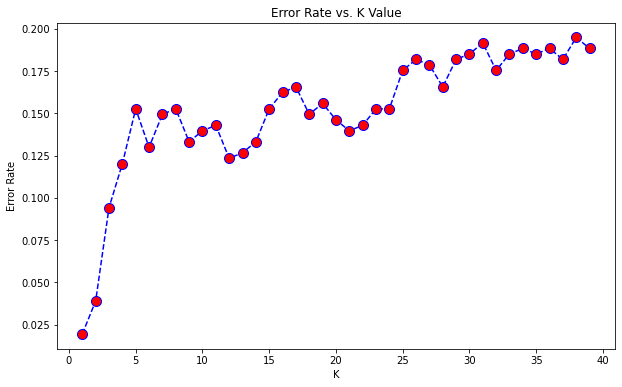

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[154   6]
 [  0 148]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       160
           1       0.96      1.00      0.98       148

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [24]:
# NOW WITH K=19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[125  35]
 [ 13 135]]


              precision    recall  f1-score   support

           0       0.91      0.78      0.84       160
           1       0.79      0.91      0.85       148

    accuracy                           0.84       308
   macro avg       0.85      0.85      0.84       308
weighted avg       0.85      0.84      0.84       308



# Simple cross validation


CV accuracy for k = 1 is 94%

CV accuracy for k = 3 is 87%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 84%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 88%

CV accuracy for k = 13 is 88%

CV accuracy for k = 15 is 86%

CV accuracy for k = 17 is 86%

CV accuracy for k = 19 is 87%

CV accuracy for k = 21 is 88%

CV accuracy for k = 23 is 86%

CV accuracy for k = 25 is 87%

CV accuracy for k = 27 is 87%

CV accuracy for k = 29 is 85%


Text(0, 0.5, 'Accuracy Rate')

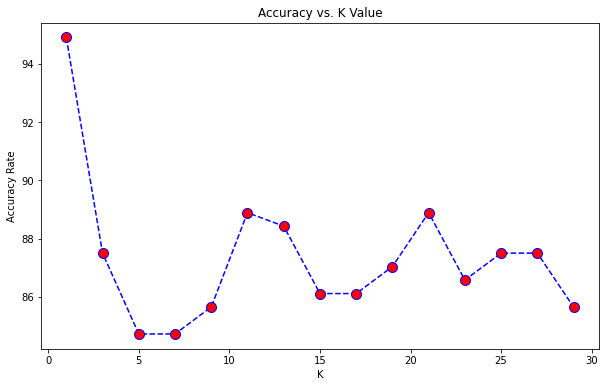

In [25]:
# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_train, y_train,
test_size=0.3)
neibhbors=[]
accuracy=[]
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    
    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    neibhbors.append(i)
    accuracy.append(acc)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30,2),accuracy,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [26]:
knn1 = KNeighborsClassifier(13)
knn1.fit(X_tr,y_tr)
pred1 = knn1.predict(X_test)
acc = accuracy_score(y_test, pred1, normalize=True) * float(100)
print('\n****Test accuracy for k = 15 is %d%%' % (acc))


****Test accuracy for k = 15 is 83%


# 10 fold cross validation


The optimal number of neighbors is 1.


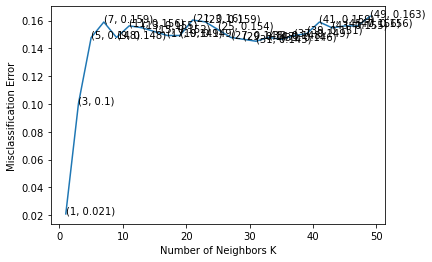

the misclassification error for each k value is :  [0.021 0.1   0.148 0.159 0.148 0.156 0.155 0.152 0.149 0.149 0.16  0.159
 0.154 0.148 0.147 0.145 0.148 0.146 0.149 0.151 0.159 0.155 0.156 0.156
 0.163]


In [28]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each k value is : ", np.round(MSE,3))

In [29]:
# NOW WITH K=27
knn2 = KNeighborsClassifier(n_neighbors=27)
knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)
print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred2))
print('\n')
print(classification_report(y_test,pred2))
acc = accuracy_score(y_test, pred2, normalize=True) * float(100)
print('\n****Test accuracy for k = 27 is %d%%' % (acc))

WITH K=27


[[118  42]
 [ 13 135]]


              precision    recall  f1-score   support

           0       0.90      0.74      0.81       160
           1       0.76      0.91      0.83       148

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308


****Test accuracy for k = 27 is 82%
